# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Logistic Regression

Week 4 | Day 1

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Define logistic regression
- Explain the math behind logistic regression
- Implement a logistic regression in code

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

wine_palette = sns.xkcd_palette(['dandelion', 'claret'])

## Logistic Regression

Logistic regression models are far and away the most common _classification_ models. Today, we're going to learn the how and why of these models.


Check: What is classification and how it it different than regression?

## 1: A (brief) review of regression models

To understand how logistic regression works, we'll start with a refresher on standard regression. A regression with one predictor, **x1**, predicting **y** can be specified as:

### $$E[y] = \beta_0 + \sum_{i}^N\beta_ix_i$$

Where:
- **`E[y]`** is the expected value (mean) of y
- **`i thru N`** are the observations (rows) of the data
- **`beta_0`** is the intercept
- **`beta_i`** is the coefficient for the predictor **`x_i`**

## We'll be working through an example using the wine quality dataset from UCI


We will be using data on properties of red and white wines. They come in two separate files, one for each class of wine, which we will concatenate together after assigning classes.

In [13]:
# load our data
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [3]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Let's add binary columns indicating red wine vs white wine (1 for red, 0 for white)

In [14]:
red['red_wine'] = 1
white['red_wine'] = 0

## Now we'll concatenate the red and white datasets

In [15]:
wine = pd.concat([red, white])
wine_n = wine.copy()

print wine_n.shape
print red.shape
print white.shape

(6497, 13)
(1599, 13)
(4898, 13)


In [62]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


## We'll now scale the feature columns through normalization

**Normalization** in this case means subtracting the column means and dividing by the column standard deviations, aka standardization. This brings all our features into a range with a mean of zero $(\mu = 0)$ and a standard deviation of 1 $(\sigma = 1)$. Many machine learning algorithms require this and it is almost never a bad idea to do so. [More on Standardization](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html)

- The **`.mean()`** DataFrame function can calculate the column means
- The **`.std()`** DataFrame function can calculate the column standard deviations

## Standardization

In [16]:
wine.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality', u'red_wine'],
      dtype='object')

In [17]:
# Normalize the columns in red and white. Subtract mean and divide by standard deviation
nc = [x for x in wine.columns if x != 'red_wine']

wine_n.ix[:, nc] = (wine_n.ix[:, nc] - wine_n.ix[:, nc].mean())\
                   / wine_n.ix[:, nc].std()

## Plot a regplot predicting binary red_wine column with density

(-0.3, 1.3)

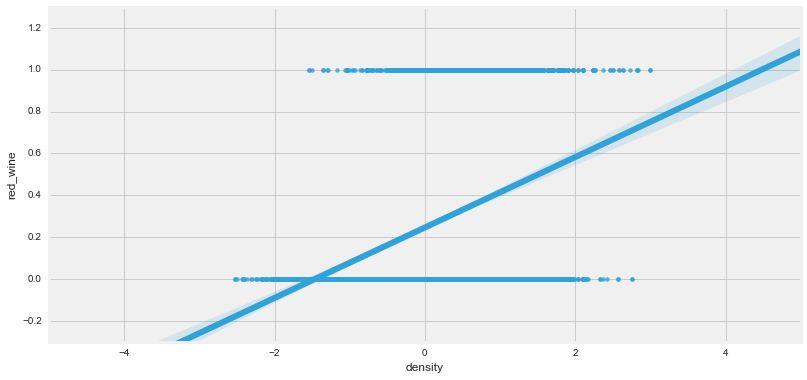

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.regplot(wine_n['density'], wine_n['red_wine'], ax=ax)
ax.set_xlim(-5, 5)
ax.set_ylim(-0.3, 1.3)

See any problems with this?

## Another example - predicting malignant tumors by tumor size

<center><img src="http://i.imgur.com/rM9ejAc.png" width=700></center>

<center><img src="http://i.imgur.com/QreIo2Z.png" width=700></center>

<center><img src="http://i.imgur.com/duGwLrh.png" width=900></center>

## What is logistic regression?

As the name implies, logistic regression is also a regression. There is still an intercept and coefficients multiplied by each predictor. 

In the case of logistic regression, however, the target variable is **categorical** as is the case in all classification problems, and therefore the regression is solving for the **probability of classes in the target variable** rather than the mean value of the target variable.

## The binary classes case

Logistic regression can solve problems where there are multiple classes (multinomial regression) in a couple of ways, but the standard is to solve a binary class problem. To keep things simple we will be looking at the 2-class case.

The logistic regression is still solving for an expected value, but in the binary classification case **this expected value is the probability of being in one class vs. the other:**

### $$E[y \in {0,1}] = P(y = 1)$$

In our simple regression formula we now have:

### $$P(y = 1) = \beta_0 + \sum_{i}^N\beta_ix_i$$

## The probability estimation dilemma

### $$P(y = 1) = \beta_0 + \sum_{i}^N\beta_ix_i$$

There is an important problem with this new equation that estimates a probability instead of a real number.

**A. Probabilities are guaranteed to be between 0 and 1.**

**B. Given unknown new predictor values, there is no guarantee that the right hand of the equation will sum to a value between 0 and 1.**

## Odds ratios

We have to modify the regression problem for it to work for predicting probabilities, and the solution relies on the use of **odds ratios**. 

Probabilities can be alternatively expressed as odds ratios. The odds ratio for probability **p** is defined:

### $$\text{odds ratio}(p) = \frac{p} {1-p}$$

The odds ratio of a probability is a measure of **how many times more likely one outcome is than the inverse case**.

For example:

- When **`p = 0.5`**: **`odds ratio = 1`**
    - it is equally likely to happen as it is to not happen.
- When **`p = 0.75`**: **`odds ratio = 3`**
    - it is 3 times more likely to happen than not happen.
- When **`p = 0.40`**: **`odds ratio = 0.666..`**
    - it is 2/3rds as likely to happen than not happen.

## Odds ratio in place of probability

We can put the odds ratio in place of the probability on the left side of the regression equation.

### $$ \frac{p}{1-p} = \beta_0 + \sum_{i}^N\beta_ix_i$$

But we still have a problem...

The range of odds ratio should be restricted to the range **`[0, infinity]`**

But our regression model could still predict **new values of y that are between negative infinity and infinity**

## Log odds

If we take the **natural logarithm** of a variable that falls **between 0 and infinity** (here the odds ratio), we transform it into a variable that falls between the range **negative infinity and infinity**.

The regression can now predict any negative or positive number, and we can convert it back into the odds ratio by using the inverse of the natural log, or e.

## Plotting log odds

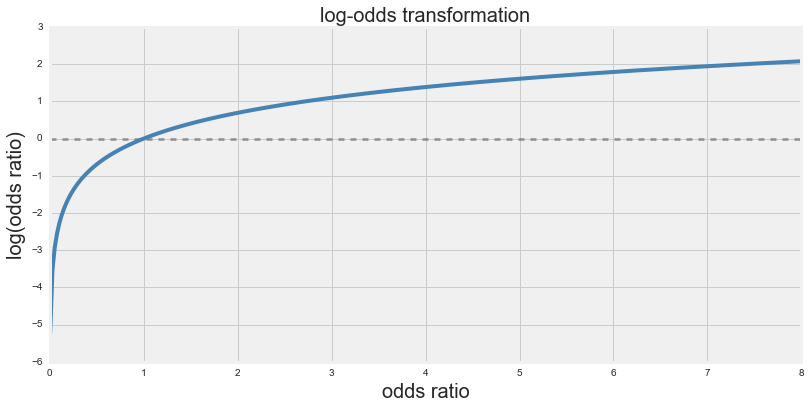

In [28]:
xs = np.linspace(-0100, 8, 3000)
ys = np.log(xs)

plt.figure(figsize=(12,6))
plt.axhline(y=0, linewidth=3, c='k', ls='dashed', alpha=0.3)
plt.plot(xs, ys, lw=4, c='steelblue')

plt.xlabel('odds ratio', fontsize=20)
plt.ylabel('log(odds ratio)', fontsize=20)
plt.title('log-odds transformation',fontsize=20)

## Exercise

Spend a couple minutes proving that taking the natural log, ln(x), of a number from 0 to infinity results in a number between $-\infty$ and $\infty$. This should be useful: [Wolfram Alpha](https://www.wolframalpha.com/)

## The logit link function

We take the logarithm of the odds ratio to make our regression work. The definition of the transformation between the **probability** and the **logarithm of the odds ratio** is called the **logit link function**.

### $$\text{logit}\big(E[y]\big) = \text{logit}\big(P(y=1)\big) =$$<br>$$log\bigg(\frac{P(y=1)}{1-P(y=1)}\bigg) = \beta_0 + \sum_{i}^N\beta_ix_i$$



## Let's see that relationship

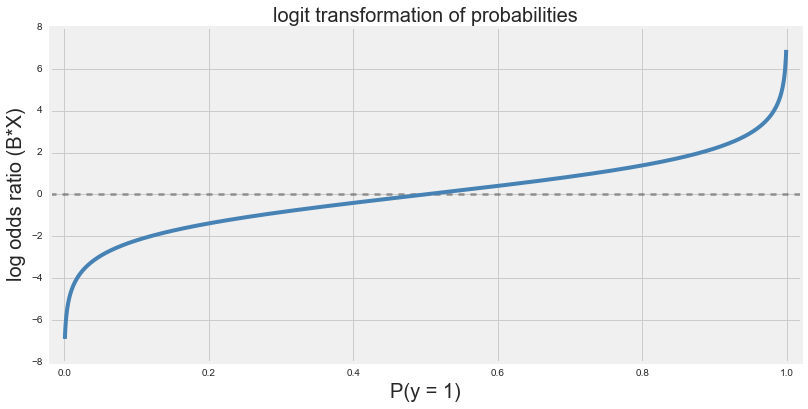

In [69]:
# list of sample probabilities that y=1
probs = np.linspace(0.001, 0.999, 2000)
# logits of odds ratio for those probs
logits = np.log((probs/(1-probs)))

plt.figure(figsize=(12,6))
plt.axhline(y=0, linewidth=3, c='k', ls='dashed', alpha=0.3)
plt.plot(probs, logits, lw=4, c='steelblue')

plt.xlim(-0.02, 1.02)

plt.xlabel('P(y = 1)', fontsize=20)
plt.ylabel('log odds ratio (B*X)', fontsize=20)
plt.title('logit transformation of probabilities',fontsize=20)

## But what we really want to solve for is the P=1

For that we need one more step: the inversion of the logit link function. This is called the **logistic function**. By inverting the logit, we can have the right side of our regression equation explicitly solving for **`P(y = 1)`** instead of the log odds.

### $$P(y=1) = logit^{-1}\bigg(\beta_0 + \sum_{i}^N\beta_ix_i\bigg)$$

Where:

### $$logit^{-1}(a) = logistic(a) = \frac{e^{a}}{e^{a} + 1}$$ 

Giving us:

### $$P(y=1) = \frac{e^{\big(\beta_0 + \sum_{i}^N\beta_ix_i\big)}}{e^{\big(\beta_0 + \sum_{i}^N\beta_ix_i\big)}+1}$$

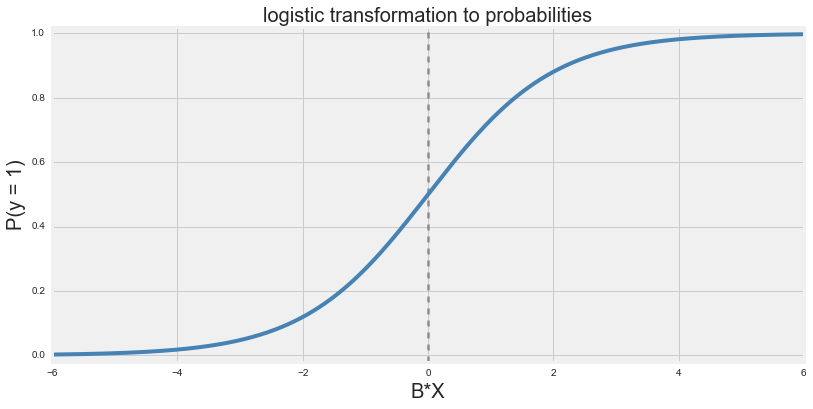

In [71]:
values = np.linspace(-6, 6, 2000)
probs = np.exp(values)/(np.exp(values)+1)

plt.figure(figsize=(12,6))
plt.axvline(x=0, linewidth=3, c='k', ls='dashed', alpha=0.3)
plt.plot(values, probs, lw=4, c='steelblue')

plt.ylim(-0.02, 1.02)

plt.xlabel('B*X', fontsize=20)
plt.ylabel('P(y = 1)', fontsize=20)
plt.title('logistic transformation to probabilities',fontsize=20)

## Implementing a logistic regression in statsmodels

## We're going to be working with the graduate school admission dataset

This dataset has columns for undergraduate gpa, gre score, and the rank of the students undergraduate institution. These are used to predict the outcome of acceptance to the graduate school program.

## Import statsmodels and read in our data

In [29]:
import statsmodels.api as sm

df = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


## Change column names & create dummy variables

In [30]:
df.columns = list(df.columns)[:3] + ["prestige"]

In [31]:
dummy_ranks = pd.get_dummies(df["prestige"], prefix="prestige")
dummy_ranks.head()

,prestige_1,prestige_2,prestige_3,prestige_4
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


## Drop one of the dummies - this becomes our "base case"

In [32]:
cols_to_keep = ["admit", "gre", "gpa"]
data = df[cols_to_keep].join(dummy_ranks.ix[:, :"prestige_3"])
data.head()

,admit,gre,gpa,prestige_1,prestige_2,prestige_3
0,0,380,3.61,0.0,0.0,1.0
1,1,660,3.67,0.0,0.0,1.0
2,1,800,4.00,1.0,0.0,0.0
3,1,640,3.19,0.0,0.0,0.0
4,0,520,2.93,0.0,0.0,0.0


## Add an intercept column

In [33]:
# stats models has no intercept by default
data["intercept"] = 1.0
train_cols = data.columns[1:]

In [34]:
data.head()

,admit,gre,gpa,prestige_1,prestige_2,prestige_3,intercept
0,0,380,3.61,0.0,0.0,1.0,1.0
1,1,660,3.67,0.0,0.0,1.0,1.0
2,1,800,4.00,1.0,0.0,0.0,1.0
3,1,640,3.19,0.0,0.0,0.0,1.0
4,0,520,2.93,0.0,0.0,0.0,1.0


## Fit the model

In [35]:
# use our target vector and our feature matrix
logit = sm.Logit(data["admit"], data[train_cols])

In [36]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


## View our results

In [37]:
result.summary2()

#in lower table the intercept is the y and the other lines' coefficients are the weights to the betas (e.g. .0023x1, .8040x2)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.083     
Dependent Variable: admit            AIC:              470.5175  
Date:               2016-10-11 14:33 BIC:              494.4663  
No. Observations:   400              Log-Likelihood:   -229.26   
Df Model:           5                LL-Null:          -249.99   
Df Residuals:       394              LLR p-value:      7.5782e-08
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
gre            0.0023    0.0011   2.0699  0.0385   0.0001   0.0044
gpa            0.8040    0.3318   2.4231  0.0154   0.1537   1.4544
prestige_1     1.5515    0.4178   3.7131  0.0002   0.7325   2.3704
prestige_2     0.8760    0.3667   2.3887  0.0169   0.1572   1.5948
prestige_3     0.2113    0.3929   0.5378  0.5907  -0.5587   0.9812
intercept     -5.5414    1.1381  -4.8691  0.0000  -7.7720  -3.3109
=================================================================

"""

## How to interpret our data

- For every one unit change in gre, the log odds of admission (versus non-admission) increases by 0.002.
- For a one unit increase in gpa, the log odds of being admitted to graduate school increases by 0.804.
- The coefficients for the categories of rank have a slightly different interpretation. For example, having attended an undergraduate institution with a rank of 1, versus an institution with a rank of 4, increases the log odds of admission by 1.55. [More](http://www.ats.ucla.edu/stat/mult_pkg/faq/general/odds_ratio.htm)

## Can we get from log odds back to odds?

Yes. 

So for a one unit increase in gpa, we get e^0.8040 = 2.23 or 123% increase in the odds of acceptance.

## Exercise

What is the increase in the odds of acceptance for a one unit change in gre? How about for a prestige 2 school vs. a prestige 4 school? Re-run this code with the standardization. How does it change the output? What is the meaning of a one-unit change now?

## Independent Practice

Using the starter code, build a classification model for breast cancer. The aim is to use tumor characteristics (features) to determine likelihood of the tumor being malignant (M) or benign (B).